


**MAKİNE ÖĞRENMESİ ile DOLAR KURU TAHMİNİ**

**ESRA TÜRKAN** 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/uygulamalar/makine_ogrenmesi/dolar_tahmini/dataset_2018 - dataset_2018.csv")
df.head()

,gun,tarih,alis,satis
0,1,02-01-2018,3.77,3.78
1,2,03-01-2018,3.77,3.77
2,3,04-01-2018,3.76,3.77
3,4,05-01-2018,3.76,3.77
4,5,08-01-2018,3.75,3.75


In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/uygulamalar/makine_ogrenmesi/dolar_tahmini/train.csv")

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/uygulamalar/makine_ogrenmesi/dolar_tahmini/test.csv")

In [ ]:
#data frame dilimleme
data_day_test = data_test.iloc[:,0:1]
data_price_test = data_test.iloc[:,3:4]

In [ ]:
#data frame dilimleme
data_day_train = data_train.iloc[:,0:1]
data_price_train = data_train.iloc[:,3:4]

**Veri seti okunur.**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/uygulamalar/makine_ogrenmesi/dolar_tahmini/dataset_2018 - dataset_2018.csv")

In [ ]:
#data frame dilimleme
data_day = dataset.iloc[:,0:1]
data_price = dataset.iloc[:,3:4]


In [ ]:
dataset.head

<bound method NDFrame.head of      gun       tarih   alis  satis
0      1  02-01-2018   3.77   3.78
1      2  03-01-2018   3.77   3.77
2      3  04-01-2018   3.76   3.77
3      4  05-01-2018   3.76   3.77
4      5  08-01-2018   3.75   3.75
..   ...         ...    ...    ...
974  975  25-11-2021  12.61  12.63
975  976  26-11-2021  12.00  12.02
976  977  29-11-2021  12.08  12.10
977  978  30-11-2021  12.66  12.68
978  979  01-12-2021  12.94  12.96

[979 rows x 4 columns]>

In [ ]:
data_date

,tarih
0,02-01-2018
1,03-01-2018
2,04-01-2018
3,05-01-2018
4,08-01-2018
...,...
974,25-11-2021
975,26-11-2021
976,29-11-2021
977,30-11-2021


In [ ]:
data_day

In [ ]:
data_price

,alis
0,3.77
1,3.77
2,3.76
3,3.76
4,3.75
...,...
974,12.61
975,12.00
976,12.08
977,12.66


In [ ]:
day_data_value=data_day.gun
price_data_value=data_price.satis

AttributeError: ignored

In [ ]:
day_data_value_test=data_day_test.gun
price_data_value_test=data_price_test.satis

In [ ]:
day_data_value_train=data_day_train.gun
price_data_value_train=data_price_train.satis

**Veri dağılımının görselleştirilmesi**

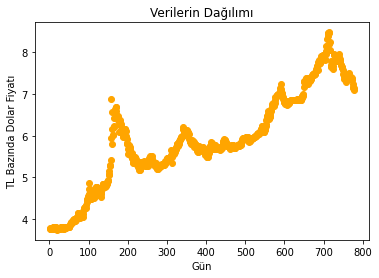

In [ ]:
#verilerin dagilimi
#plt.figure(figsize=(30, 30))

plt.scatter(day_data_value_train,price_data_value_train,color="orange")
plt.xlabel("Gün") 
plt.ylabel("TL Bazında Dolar Fiyatı")
plt.title("Verilerin Dağılımı")
plt.show()

In [ ]:
day_data2D=day_data_value.values.reshape(-1, 1)
price_data2D=price_data_value.values.reshape(-1, 1)

In [ ]:
day_data2D_test=day_data_value_test.values.reshape(-1, 1)
price_data2D_test=price_data_value_test.values.reshape(-1, 1)

In [ ]:
day_data2D_train=day_data_value_train.values.reshape(-1, 1)
price_data2D_train=price_data_value_train.values.reshape(-1, 1)

**Veri seti, test ve eğitim olmak üzere bölünür.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(day_data2D, price_data2D, test_size=0.20,
                                                    random_state=0,
                                                    shuffle=True)

**Linear Regresyon Modeli oluşturulur.**

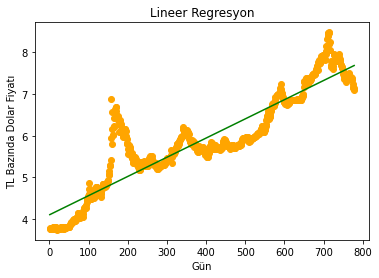

In [ ]:
from sklearn.linear_model import LinearRegression

model_linear_rg = LinearRegression().fit(day_data2D_train, price_data2D_train)

plt.scatter(day_data2D_train,price_data2D_train,color="orange")
plt.plot(day_data2D_train,model_linear_rg.predict(day_data2D_train), color ="green")
plt.xlabel("Gün") 
plt.ylabel("TL Bazında Dolar Fiyatı")
plt.title("Lineer Regresyon")
plt.show()

In [ ]:
y_predicted = model_linear_rg.predict(day_data2D_test)
linear_rg_score=r2_score(price_data2D_test,y_predicted)
print('Linear Regresyon --> Coefficient of determination:', linear_rg_score)

Linear Regresyon --> Coefficient of determination: 0.16442743004927196


In [ ]:
print( "Linear Regresyon --> Ortalama Mutlak Hata: {} \nLinear Regresyon --> Ortalama Karesel Hata: {}".format(
    mean_absolute_error(price_data2D_test, y_predicted), mean_squared_error(price_data2D_test, y_predicted)))

Linear Regresyon --> Ortalama Mutlak Hata: 0.5873308336237263 
Linear Regresyon --> Ortalama Karesel Hata: 0.8265824245937066


**Polynomial Regresyon Modeli Oluşturulması**

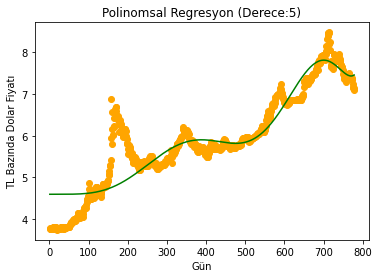

In [ ]:
#polinomsal regresyon
#polinom derecesini 6 olarak belirliyoruz (degree=6)
polreg = PolynomialFeatures(degree=9)
xpol = polreg.fit_transform(day_data2D_train)
model_poly_rg = LinearRegression().fit(xpol,price_data2D_train)
#polinomsal regresyon gorsellestirme
plt.scatter(day_data2D_train,price_data2D_train,color ="orange")
plt.plot(day_data2D_train,model_poly_rg.predict(polreg.fit_transform(day_data2D_train)), color = "green")
plt.xlabel("Gün") 
plt.ylabel("TL Bazında Dolar Fiyatı")
plt.title("Polinomsal Regresyon (Derece:5)")
plt.show()

In [ ]:
y_predicted = model_poly_rg.predict(polreg.fit_transform(day_data2D_test))
linear_rg_score=r2_score(price_data2D_test,y_predicted)
print('Linear Regresyon --> Coefficient of determination:', linear_rg_score)

ValueError: ignored

In [ ]:
print( "Polynomial Regresyon --> Ortalama Mutlak Hata: {} \nPolynomial Regresyon --> Ortalama Karesel Hata: {}".format(
    mean_absolute_error(price_data2D, y_predicted), mean_squared_error(price_data2D, y_predicted)))

Polynomial Regresyon --> Ortalama Mutlak Hata: 0.3896294528771222 
Polynomial Regresyon --> Ortalama Karesel Hata: 0.2701862401690851


**Support Vector Regression Model Oluşturulması**

In [ ]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X1 = sc_X.fit_transform(day_data2D)
y1 = sc_y.fit_transform(price_data2D)

**KERNEL DEĞİŞTİRİLİP SONUÇLAR İNCELENİR.**




In [ ]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
sv_regressor = SVR(kernel='linear')
sv_regressor.fit(X1,y1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

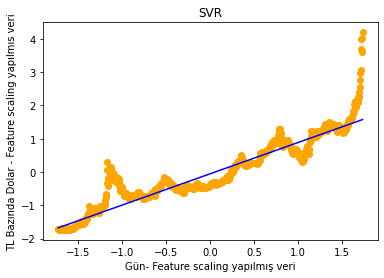

In [ ]:
plt.scatter(X1, y1, color = "orange")
plt.plot(X1, sv_regressor.predict(X1), color = "blue")
plt.title('SVR')
plt.xlabel('Gün- Feature scaling yapılmış veri')
plt.ylabel('TL Bazında Dolar - Feature scaling yapılmıs veri')
plt.show()

In [ ]:
y_predicted = sv_regressor.predict(X1)
svr_score=r2_score(y1,y_predicted)
print('Support Vector Regresyon --> Coefficient of determination:', svr_score)

Support Vector Regresyon --> Coefficient of determination: 0.8690414500394664


In [ ]:
print( "Support Vector Regresyon --> Ortalama Mutlak Hata: {} \nSupport Vector Regresyon --> Ortalama Karesel Hata: {}".format(
    mean_absolute_error(y1, y_predicted), mean_squared_error(y1, y_predicted)))

Support Vector Regresyon --> Ortalama Mutlak Hata: 0.23656627224740018 
Support Vector Regresyon --> Ortalama Karesel Hata: 0.13095854996053358


**DECISION TREE REGRESSION MODELİ OLUŞTURULMASI**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(day_data2D, price_data2D, test_size=0.20,
                                                    random_state=0,
                                                    shuffle=True)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
decisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
#Fit the regressor object to the dataset.
decisionTreeRegressor.fit(day_data2D,price_data2D)

DecisionTreeRegressor(max_depth=2)

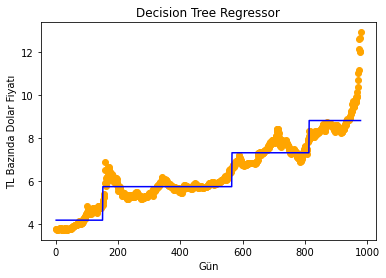

In [ ]:
plt.scatter(day_data2D, price_data2D, color = 'orange')
plt.plot(day_data2D, decisionTreeRegressor.predict(day_data2D), color = 'blue')
plt.title('Decision Tree Regressor')
plt.xlabel('Gün')
plt.ylabel('TL Bazında Dolar Fiyatı')
plt.show()

In [ ]:
dtr_score = decisionTreeRegressor.score(day_data2D,price_data2D)
print('DECISION TREE REGRESSION --> Coefficient of determination:', dtr_score)

DECISION TREE REGRESSION --> Coefficient of determination: 0.8940019713017464
